In [1]:
import pandas as pd
import numpy as np
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

np.random.seed(0)
tensorflow.random.set_seed(0)

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Preparation

In [4]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
import pylab as plt

Text(0.5, 1.0, 'Gender Histogram')

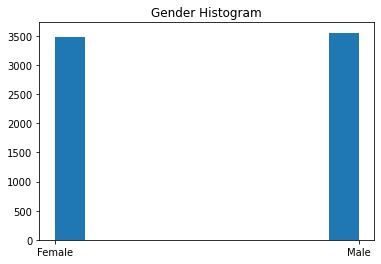

In [6]:
plt.hist(df['gender'])
plt.title('Gender Histogram')

The histogram show the number of males and females is a close difference.

<AxesSubplot:title={'center':'Contract Counts'}>

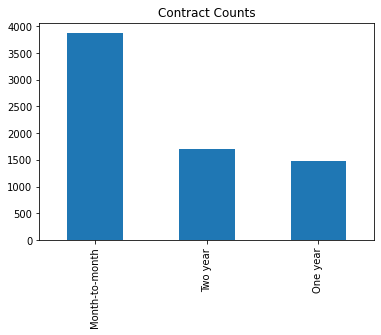

In [7]:
df['Contract'].value_counts().plot(kind='bar', title='Contract Counts')

The month to month customers are significantly higher.

<AxesSubplot:title={'center':'Payment Method Counts'}>

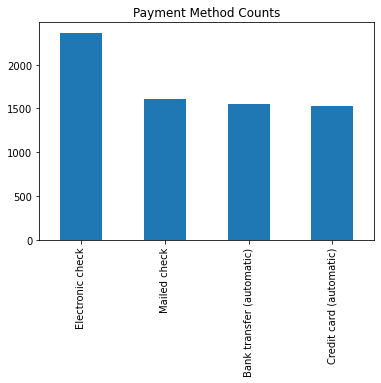

In [8]:
df['PaymentMethod'].value_counts().plot(kind='bar', title='Payment Method Counts')

The Electronic check is the most preffered mode of payment 

In [9]:
pclass_xt = pd.crosstab(df['PaymentMethod'], df['Churn'])
pclass_xt

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


Text(0, 0.5, 'Churn')

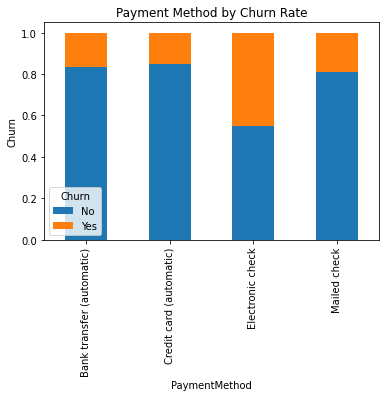

In [10]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Payment Method by Churn Rate')
plt.xlabel('PaymentMethod')
plt.ylabel('Churn')

Most customers who churn tend to use Electronic Check payment mode. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Reducing size of DF from 7043 to 1761
df = df.sample(frac =.25, random_state= 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 2200 to 450
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object

In [13]:
# Dropping Duplicates in Dataset

df.drop_duplicates(subset=None, keep= False, inplace= True)

In [14]:
# Dropping customerID column
df.drop(labels= 'customerID' , axis=1, inplace= True)

Converting binary values to respective 0s and 1s depending of freq

In [15]:
#Details of the Gender column
df.gender.describe()

count     1761
unique       2
top       Male
freq       926
Name: gender, dtype: object

In [16]:
#Replacing most frequent value->'Male' with 1 and 'Female' with 0
df["gender"].replace(to_replace='Male', value= 1, inplace=True)
df["gender"].replace(to_replace='Female', value= 0, inplace=True)

In [17]:
#Details of the Partner column
df.Partner.describe()

count     1761
unique       2
top         No
freq       918
Name: Partner, dtype: object

In [18]:
#Replacing most frequent value->'No' with 1 and 'Yes' with 0

df['Partner'].replace(to_replace = 'No', value = 1, inplace = True )
df['Partner'].replace(to_replace = 'Yes', value = 0, inplace = True )

In [19]:
df['Dependents'].describe()

count     1761
unique       2
top         No
freq      1242
Name: Dependents, dtype: object

In [20]:
#Replacing most frequent value->'No' with 1 and 'Yes' with 0

df['Dependents'].replace(to_replace = 'No', value = 1, inplace = True )
df['Dependents'].replace(to_replace = 'Yes', value = 0, inplace = True )

In [21]:
df['PhoneService'].describe()

count     1761
unique       2
top        Yes
freq      1586
Name: PhoneService, dtype: object

In [22]:
#Replacing most frequent value->'Yes' with 1 and 'No' with 0

df['PhoneService'].replace(to_replace = 'Yes', value = 1, inplace = True )
df['PhoneService'].replace(to_replace = 'No', value = 0, inplace = True )

In [23]:
df['PaperlessBilling'].describe()

count     1761
unique       2
top        Yes
freq      1015
Name: PaperlessBilling, dtype: object

In [24]:
#Replacing most frequent value->'Yes' with 1 and 'No' with 0

df['PaperlessBilling'].replace(to_replace = 'Yes', value = 1, inplace = True )
df['PaperlessBilling'].replace(to_replace = 'No', value = 0, inplace = True )

In [25]:
df['Churn'].describe()

count     1761
unique       2
top         No
freq      1298
Name: Churn, dtype: object

In [26]:
#Replacing most frequent value->'Yes' with 1 and 'No' with 0

df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True )
df['Churn'].replace(to_replace = 'No', value = 0, inplace = True )

Inducing random null values in the 6 columns

In [27]:
column_list = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
rand_st = 0
for column in column_list:
    df.loc[df.sample(frac = .17, random_state = rand_st).index,column] = np.NaN
    rand_st += 5

Missing values need to be between 5-10% 

In [28]:
# % of missing values
df.isna().sum().sum()/(len(df)*len(df.columns))

0.05093696763202726

Finding unique values, imputing null values with most frequent value and processing one hot vector for then next 6 variables

In [29]:
# Values in col Online Security
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service', nan], dtype=object)

In [30]:
df['OnlineSecurity'].describe()

count     1462
unique       3
top         No
freq       739
Name: OnlineSecurity, dtype: object

In [31]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['OnlineSecurity'].replace(to_replace = 'Yes', value = 0, inplace = True )
df['OnlineSecurity'].replace(to_replace = 'No', value = 1, inplace = True )
df['OnlineSecurity'].replace(to_replace = np.nan , value = 1, inplace = True )

In [32]:
dummies = pd.get_dummies(df['OnlineSecurity'], prefix = 'OnlineSecurity')
df[dummies.columns] = dummies
df.drop('OnlineSecurity', axis = 1, inplace = True)

In [33]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service', nan], dtype=object)

In [34]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['OnlineBackup'].replace(to_replace = 'Yes', value = 0, inplace = True )
df['OnlineBackup'].replace(to_replace = 'No', value = 1, inplace = True )
df['OnlineBackup'].replace(to_replace = np.nan, value = 1, inplace = True )

In [35]:
dummies = pd.get_dummies(df['OnlineBackup'], prefix = 'OnlineBackup')
df[dummies.columns] = dummies
df.drop('OnlineBackup', axis = 1, inplace = True)

In [36]:
df['DeviceProtection'].unique()

array(['No', nan, 'No internet service', 'Yes'], dtype=object)

In [37]:
df['DeviceProtection'].describe()

count     1462
unique       3
top         No
freq       629
Name: DeviceProtection, dtype: object

In [38]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['DeviceProtection'].replace(to_replace = 'Yes', value = 0, inplace = True )
df['DeviceProtection'].replace(to_replace = 'No', value = 1, inplace = True )
df['DeviceProtection'].replace(to_replace = np.nan, value = 1, inplace = True )

In [39]:
dummies = pd.get_dummies(df['DeviceProtection'], prefix = 'DeviceProtection')
df[dummies.columns] = dummies
df.drop('DeviceProtection', axis = 1, inplace = True)

In [40]:
df['TechSupport'].unique()

array(['No', 'Yes', nan, 'No internet service'], dtype=object)

In [41]:
df['TechSupport'].describe()

count     1462
unique       3
top         No
freq       691
Name: TechSupport, dtype: object

In [42]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['TechSupport'].replace(to_replace = 'Yes', value = 0, inplace = True )
df['TechSupport'].replace(to_replace = 'No', value = 1, inplace = True )
df['TechSupport'].replace(to_replace = np.nan, value = 1, inplace = True )

In [43]:
dummies = pd.get_dummies(df['TechSupport'], prefix = 'TechSupport')
df[dummies.columns] = dummies
df.drop('TechSupport', axis = 1, inplace = True)

In [44]:
df['StreamingTV'].unique()

array(['Yes', 'No internet service', 'No', nan], dtype=object)

In [45]:
df['StreamingTV'].describe()

count     1462
unique       3
top        Yes
freq       571
Name: StreamingTV, dtype: object

In [46]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['StreamingTV'].replace(to_replace = 'Yes', value = 0, inplace = True )
df['StreamingTV'].replace(to_replace = 'No', value = 1, inplace = True )
df['StreamingTV'].replace(to_replace = np.nan, value = 1, inplace = True )

In [47]:
dummies = pd.get_dummies(df['StreamingTV'], prefix = 'StreamingTV')
df[dummies.columns] = dummies
df.drop('StreamingTV', axis = 1, inplace = True)

In [48]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service', nan], dtype=object)

In [49]:
df['StreamingMovies'].describe()

count     1462
unique       3
top        Yes
freq       582
Name: StreamingMovies, dtype: object

In [50]:
#Replacing most frequent value->'Yes' with 0 and 'No' with 1

df['StreamingMovies'].replace(to_replace = 'Yes', value = 1, inplace = True )
df['StreamingMovies'].replace(to_replace = 'No', value = 0, inplace = True )
df['StreamingMovies'].replace(to_replace = np.nan, value = 1, inplace = True )

In [51]:
dummies = pd.get_dummies(df['StreamingMovies'], prefix = 'StreamingMovies')
df[dummies.columns] = dummies
df.drop('StreamingMovies', axis = 1, inplace = True)

Identifying categorical variables with multiple inputs and converting to one hot vector

In [52]:
df.MultipleLines.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [53]:
dummies = pd.get_dummies(df['MultipleLines'], prefix = 'MultipleLines')
df[dummies.columns] = dummies
df.drop('MultipleLines', axis = 1, inplace = True)

In [54]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [55]:
dummies = pd.get_dummies(df['InternetService'], prefix = 'InternetService')
df[dummies.columns] = dummies
df.drop('InternetService', axis = 1, inplace = True)

In [56]:
df.Contract.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [57]:
dummies = pd.get_dummies(df['Contract'], prefix = 'Contract')
df[dummies.columns] = dummies
df.drop('Contract', axis = 1, inplace = True)

In [58]:
df.PaymentMethod.unique()

array(['Electronic check', 'Credit card (automatic)', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

In [59]:
dummies = pd.get_dummies(df['PaymentMethod'], prefix = 'PaymentMethod')
df[dummies.columns] = dummies
df.drop('PaymentMethod', axis = 1, inplace = True)

Converting datatype 

In [60]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [61]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0,0,1,1,19,1,0,58.20,1045.25,0,...,1,0,0,0,1,0,0,0,1,0
4627,1,0,1,1,60,1,1,116.60,7049.50,0,...,0,1,0,0,1,0,0,1,0,0
3225,0,0,1,1,13,1,1,71.95,923.85,0,...,1,0,0,1,0,0,0,0,1,0
2828,1,0,1,1,1,1,0,20.45,20.45,0,...,0,0,1,0,0,1,0,0,0,1
3768,0,0,0,1,55,1,1,77.75,4266.40,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,0,0,0,1,71,1,1,83.30,5894.50,0,...,1,0,0,0,0,1,0,1,0,0
2551,0,0,1,1,12,1,0,19.45,227.45,0,...,0,0,1,1,0,0,1,0,0,0
5735,0,0,0,0,48,1,0,20.00,935.90,0,...,0,0,1,0,0,1,0,0,0,1
5096,1,0,0,0,71,1,0,86.85,6263.80,0,...,1,0,0,0,0,1,1,0,0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 2200 to 450
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1761 non-null   int64  
 1   SeniorCitizen                            1761 non-null   int64  
 2   Partner                                  1761 non-null   int64  
 3   Dependents                               1761 non-null   int64  
 4   tenure                                   1761 non-null   int64  
 5   PhoneService                             1761 non-null   int64  
 6   PaperlessBilling                         1761 non-null   int64  
 7   MonthlyCharges                           1761 non-null   float64
 8   TotalCharges                             1758 non-null   float64
 9   Churn                                    1761 non-null   int64  
 10  OnlineSecurity_0                         1761 

In [63]:
df = df.dropna()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 2200 to 450
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1758 non-null   int64  
 1   SeniorCitizen                            1758 non-null   int64  
 2   Partner                                  1758 non-null   int64  
 3   Dependents                               1758 non-null   int64  
 4   tenure                                   1758 non-null   int64  
 5   PhoneService                             1758 non-null   int64  
 6   PaperlessBilling                         1758 non-null   int64  
 7   MonthlyCharges                           1758 non-null   float64
 8   TotalCharges                             1758 non-null   float64
 9   Churn                                    1758 non-null   int64  
 10  OnlineSecurity_0                         1758 

## Data Splitting

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [66]:
y = df['Churn']
X = df.drop('Churn',axis=1,inplace= False)

In [67]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

We need to bring all the features into a fixed range without changing the overall behavior of the dataset. 
Since 19 columns of our dataset contain categorical values, we have used MinMaxScaler to scale our data and as we see from the ghaphs above the data is not normally distributed.. 



## Classification Results from Project 1

All scores are roc_auc scoring

| Model | Best Parameters| Validation Score | Test Score (roc_auc) | Test Score (accuracy) |
| --- | --- | --- | --- | --- |
| KNN | N_Neighbors = 9 | 0.7724 | 0.6659 | 0.7273 |
| Logistic Regression | C = 0.1| 0.8261 | 0.6366 | 0.7358 |
| Linear SVC | C = 0.01 | 0.8270 | 0.6336 | 0.7386 | 
| SVR Linear Kernel | C = 0.1 | 0.8190 | 0.6458 | 0.7415 |
| SVR Poly Kernel| C = 1, coef0 = 0, degree = 1 | 0.8189 | 0.6458 | 0.7415 |
| SVR RBF Kernel | C = 100, Gamma = 0.001| 0.8224 | 0.6458 | 0.7415 | 
| Decision Tree | max_depth = 3 | 0.7866 | 0.6914 |  0.7330 | 

# Project 2

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

Run the best params of the models from Project 1 (based on the roc_auc score)

In [69]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)
print('Accuracy:', knn.score(X_test,y_test))
print('Roc_auc: ',roc_auc_score(y_test, knn.predict(X_test)))

Accuracy: 0.7272727272727273
Roc_auc:  0.6658738248952316


In [70]:
logit = LogisticRegression(C= .1, penalty= 'l2', max_iter = 100000)
logit.fit(X_train,y_train)
logit.score(X_test,y_test)
print('Accuracy:', logit.score(X_test,y_test))
print('Roc_auc: ',roc_auc_score(y_test, logit.predict(X_test)))

Accuracy: 0.7357954545454546
Roc_auc:  0.6366330652773058


In [71]:
linearSVC = LinearSVC(C = .01, dual = False)
linearSVC.fit(X_train,y_train)
linearSVC.score(X_test,y_test)
print('Accuracy:', linearSVC.score(X_test,y_test))
print('Roc_auc: ',roc_auc_score(y_test, linearSVC.predict(X_test)))

Accuracy: 0.7386363636363636
Roc_auc:  0.6336315928568732


In [72]:
svc_lin = SVC(C= .1, kernel = 'linear', random_state = 0, probability = True)
svc_lin.fit(X_train,y_train)
svc_lin.score(X_test,y_test)
print('Accuracy:', svc_lin.score(X_test,y_test))
print('Roc_auc: ',roc_auc_score(y_test, svc_lin.predict(X_test)))

Accuracy: 0.7414772727272727
Roc_auc:  0.6458073772039113


In [73]:
svc_poly = SVC(C= 1, coef0= 0, degree= 1, kernel= 'poly', random_state = 0, probability = True)
svc_poly.fit(X_train, y_train)
svc_poly.score(X_test,y_test)
print('Accuracy:', svc_poly.score(X_test,y_test))
print('Roc_auc: ',roc_auc_score(y_test, svc_poly.predict(X_test)))

Accuracy: 0.7414772727272727
Roc_auc:  0.6458073772039113


In [74]:
svc_rbf = SVC(C= 100, gamma= 0.001, kernel= 'rbf',random_state = 0, probability = True)
svc_rbf.fit(X_train,y_train)
pred = svc_rbf.predict(X_test)
svc_rbf.score(X_test,y_test)
print('Accuracy:', svc_rbf.score(X_test,y_test))
print('Roc_auc: ',roc_auc_score(y_test, pred))

Accuracy: 0.7414772727272727
Roc_auc:  0.6458073772039113


In [75]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

print('Accuracy:', tree.score(X_test,y_test))
print('Roc_auc: ',roc_auc_score(y_test, tree.predict(X_test)))

Accuracy: 0.7329545454545454
Roc_auc:  0.6193981953411107


## Hard Voting Classifier

In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
hard_vote = VotingClassifier(estimators=[('knn', knn),('logit',logit), ('linSVC', linearSVC), ('svc_lin', svc_lin), ('svc_poly', svc_poly), ('svc_rbf', svc_rbf)], voting='hard')
hard_vote.fit(X_train, y_train)
y_pred = hard_vote.predict(X_test)
print('roc_auc: ',roc_auc_score(y_test, y_pred))
print('test score accuracy: ', hard_vote.score(X_train,y_train))

roc_auc:  0.6453354475780572
test score accuracy:  0.8143669985775249


Hard voting gives a roc_auc score of 0.6479

## Soft Voting Classifier

In [77]:
soft_vote = VotingClassifier(estimators=[('knn', knn), ('logit',logit),('svc_lin', svc_lin),
    ('svc_rbf', svc_rbf), ('svc_poly', svc_poly)], voting='soft')
soft_vote.fit(X_train, y_train)
y_pred = soft_vote.predict(X_test)
print('roc_auc: ',roc_auc_score(y_test, y_pred))
print('test score accuracy: ', soft_vote.score(X_train,y_train))

roc_auc:  0.6391626080718844
test score accuracy:  0.8150782361308677


Soft voting gives a roc auc score of 0.6392

## Bagging

In [78]:
%%time
from sklearn.ensemble import BaggingClassifier
#Bagging with the logistic regression model
param_grid = {'n_estimators':[10, 50, 100],
              'max_samples':[0.01, 0.05, 0.1, 0.5, 1], 
              'max_features':[0.01, 0.05, 0.1, 0.5, 1],
              'bootstrap':[True],
             'random_state':[0],
             'base_estimator__C': [0.01, 0.1, 1, 10, 100],
             'base_estimator__max_iter':[300]}
bag_grid = GridSearchCV(BaggingClassifier(LogisticRegression()), param_grid, cv= 5, n_jobs = -1, scoring = 'roc_auc' )

bag_grid.fit(X_train,y_train)

Wall time: 2min 54s


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'base_estimator__C': [0.01, 0.1, 1, 10, 100],
                         'base_estimator__max_iter': [300], 'bootstrap': [True],
                         'max_features': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_samples': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [10, 50, 100], 'random_state': [0]},
             scoring='roc_auc')

In [79]:
print(bag_grid.best_params_)
print(bag_grid.best_score_)

{'base_estimator__C': 10, 'base_estimator__max_iter': 300, 'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100, 'random_state': 0}
0.8301096309293359


Bagging with a logistic regression gives a validation score of 0.8301 with the best parameters of C=10, max_features = 0.5, max_samples = 0.5, and n_estimators = 100

In [80]:
%%time
#Bagging with the decision tree
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': [10,50,100],
              'max_samples':[0.05, 0.1, 0.5], 
              'max_features':[0.01, 0.05, 0.1, 0.5, 1],
              'bootstrap':[True],
             'random_state':[0],
             'base_estimator__max_depth': np.arange(1,11)}
bag_grid2 = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid, cv= 5, n_jobs = -1, scoring = 'roc_auc' )
bag_grid2.fit(X_train,y_train)

Wall time: 1min 1s


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'bootstrap': [True],
                         'max_features': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_samples': [0.05, 0.1, 0.5],
                         'n_estimators': [10, 50, 100], 'random_state': [0]},
             scoring='roc_auc')

In [81]:
print(bag_grid2.best_params_)
print(bag_grid2.best_score_)

{'base_estimator__max_depth': 4, 'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100, 'random_state': 0}
0.8312154125384218


The best roc auc score is a score of 0.8312 for the decision tree. The hyperparameters are n_estimators = 100, max_feature = 0.5, and max_samples = 0.5. The hyperparameter for the decision tree is max_depth = 4

## Pasting

In [82]:
#Pasting with the SVC model with linear kernel
param_grid = {'n_estimators': [10,50,100],
              'max_samples':[0.05, 0.1, 0.5], 
              'max_features':[0.01, 0.05, 0.1, 0.5, 1],
              'bootstrap':[False],
             'random_state':[0],
             'base_estimator__kernel':['linear'],
              'base_estimator__C':[0.001, 0.01, 0.1, 1, 10, 100]}
paste_grid1 = GridSearchCV(BaggingClassifier(SVC()), param_grid, cv= 5, n_jobs = -1, scoring = 'roc_auc' )
paste_grid1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(base_estimator=SVC()), n_jobs=-1,
             param_grid={'base_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'base_estimator__kernel': ['linear'],
                         'bootstrap': [False],
                         'max_features': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_samples': [0.05, 0.1, 0.5],
                         'n_estimators': [10, 50, 100], 'random_state': [0]},
             scoring='roc_auc')

In [83]:
print(paste_grid1.best_params_)
print(paste_grid1.best_score_)

{'base_estimator__C': 100, 'base_estimator__kernel': 'linear', 'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.1, 'n_estimators': 100, 'random_state': 0}
0.8301362678440309


The best score for pasting with an SVC model with a linear kernel has a validation score of 0.8301. The base estimator hyperparameter is C = 100 and the pasting hyperparameters are n_estimators = 100, max_feature = .5 and max_samples = .1

In [84]:
#Pasting with a decision tree
param_grid = {'n_estimators': [10,50,100],
              'max_samples':[0.05, 0.1, 0.5], 
              'max_features':[0.01, 0.05, 0.1, 0.5],
              'bootstrap':[False],
             'random_state':[0],
             'base_estimator__max_depth':np.arange(1,11)}
paste_grid2 = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid, cv= 5, n_jobs = -1, scoring = 'roc_auc' )
paste_grid2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'bootstrap': [False],
                         'max_features': [0.01, 0.05, 0.1, 0.5],
                         'max_samples': [0.05, 0.1, 0.5],
                         'n_estimators': [10, 50, 100], 'random_state': [0]},
             scoring='roc_auc')

In [85]:
print(paste_grid2.best_params_)
print(paste_grid2.best_score_)

{'base_estimator__max_depth': 5, 'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.05, 'n_estimators': 50, 'random_state': 0}
0.8335770706386819


The best model for pasting with a decision tree occures when the decision tree has max_depth = 5, and the pasting classifier has n_estimators = 50, max_features = .5, and max_samples = .05. The validation score is 0.8336

## AdaBoost

In [86]:
from sklearn.ensemble import AdaBoostClassifier

#AdaBoost with a decision tree
param_grid = {'n_estimators': [50,100,150,200,300,500], 'learning_rate': [.01,.1,1], 'random_state':[0]}
ada_grid = GridSearchCV(AdaBoostClassifier(),param_grid, cv= 5, n_jobs = -1, scoring = 'roc_auc' )
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200, 300, 500],
                         'random_state': [0]},
             scoring='roc_auc')

In [87]:
print(ada_grid.best_params_)
print(ada_grid.best_score_)

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}
0.8317760274125003


In [88]:
results_ada = pd.DataFrame(ada_grid.cv_results_)

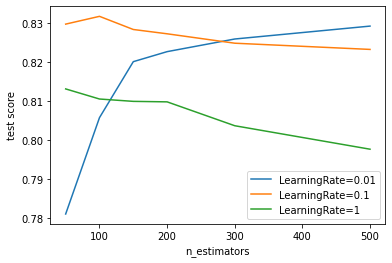

In [89]:
for lr in param_grid['learning_rate']:
    plt.plot(param_grid['n_estimators'],results_ada['mean_test_score'][results_ada['param_learning_rate'] == lr], label= 'LearningRate={}'.format(lr))

plt.xlabel('n_estimators')
plt.ylabel('test score')
plt.legend()

The best model for the decision tree is with learning rate = 0.1, n_estimators = 100 with a score 0.8318.

In [90]:
%%time
#AdaBoost with regular logistic regression 
param_grid = {'n_estimators': [50,100,150,200,300,500], 'learning_rate': [.5,1,5], 'random_state':[0]}
ada_grid2 = GridSearchCV(AdaBoostClassifier(LogisticRegression()),param_grid, cv= 5, n_jobs = -1, scoring = 'roc_auc' )
ada_grid2.fit(X_train, y_train)

Wall time: 39.3 s


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1, 5],
                         'n_estimators': [50, 100, 150, 200, 300, 500],
                         'random_state': [0]},
             scoring='roc_auc')

In [91]:
print(ada_grid2.best_params_)
print(ada_grid2.best_score_)

{'learning_rate': 0.5, 'n_estimators': 150, 'random_state': 0}
0.8270079878957791


The best model has learning rate = 0.5 and n_estimators = 150. The validation score is 0.8270

## Gradient boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': [1,2,3,4,5,6], 'n_estimators':[50,100,150], 'learning_rate':[.01,.05,.1,.5], 'random_state':[0]}
grad_boost = GridSearchCV(GradientBoostingClassifier(), param_grid, cv= 5, n_jobs = -1, scoring = 'roc_auc')
grad_boost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150], 'random_state': [0]},
             scoring='roc_auc')

In [93]:
print(grad_boost.best_params_)
print(grad_boost.best_score_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
0.8342555808786368


In [94]:
results = pd.DataFrame(grad_boost.cv_results_)

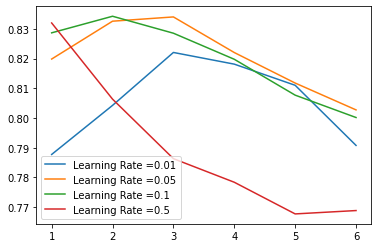

In [95]:
for lr in param_grid['learning_rate']:
    plt.plot(param_grid['max_depth'],results['mean_test_score'][(results['param_learning_rate'] == lr) &
                                                               (results['param_n_estimators'] == 50)],
            label = 'Learning Rate ={}'.format(lr))
plt.legend()

The best model has a learning rate = 0.1, n_estimators = 50, and max_depth = 2. The validation score is 0.8343

## PCA

In [96]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [97]:
pca.explained_variance_ratio_

array([2.15526685e-01, 1.38430476e-01, 8.16470272e-02, 5.01636807e-02,
       4.68676571e-02, 4.20074849e-02, 4.01400138e-02, 3.75408923e-02,
       3.56142086e-02, 3.52552638e-02, 3.24219477e-02, 3.05929752e-02,
       2.91312866e-02, 2.78108270e-02, 2.65123515e-02, 2.46748479e-02,
       2.15800333e-02, 1.88707222e-02, 1.70496034e-02, 1.26867153e-02,
       6.92049432e-03, 6.14104639e-03, 5.64096002e-03, 5.46601411e-03,
       4.75666974e-03, 4.57366179e-03, 1.11780072e-03, 6.83502641e-04,
       1.75150758e-04, 1.12033887e-31, 5.12153066e-32, 4.16533954e-32,
       2.05969474e-32, 1.87945154e-32, 1.31133749e-32, 6.47286429e-33,
       6.14230701e-33, 5.81885112e-33, 5.59155715e-33, 3.42059685e-33])

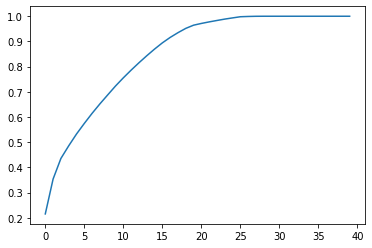

In [98]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

95% seems to be where the elbow is, so I set the PCA to explain 95% of the variance, which is 19 components (down from the original 40 features)

In [99]:
pca = PCA(n_components = .95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [100]:
X_train_pca.shape

(1406, 19)

### KNN with PCA

In [101]:
param_grid = {'n_neighbors':np.arange(1,10)}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs = -1, cv = 5,scoring = 'roc_auc')
grid_knn.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc')

In [102]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'n_neighbors': 9}
0.7679089704101385


Text(0, 0.5, 'test score')

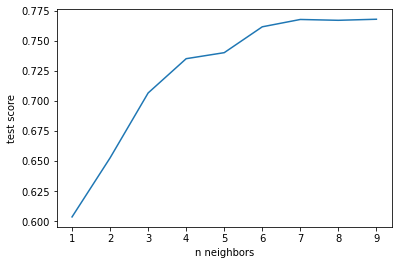

In [103]:
results = pd.DataFrame(grid_knn.cv_results_)
plt.plot(param_grid['n_neighbors'], results['mean_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('n neighbors')
plt.ylabel('test score')

In [104]:
knn = KNeighborsClassifier(**grid_knn.best_params_)
knn.fit(X_train_pca, y_train)
pred_y = knn.predict(X_test_pca)
roc_auc_score(y_test, pred_y)

0.636765205572545

### Logistic Regression with PCA

In [105]:
param_grid = {'C':[.001,.01,.1,1,10,100,1000], 'random_state':[0]}
grid_logit = GridSearchCV(LogisticRegression(),param_grid,scoring='roc_auc',cv=5,n_jobs = -1)
grid_logit.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'random_state': [0]},
             scoring='roc_auc')

In [106]:
print(grid_logit.best_params_)
print(grid_logit.best_score_)

{'C': 1, 'random_state': 0}
0.8248097113486608


Text(0, 0.5, 'test score')

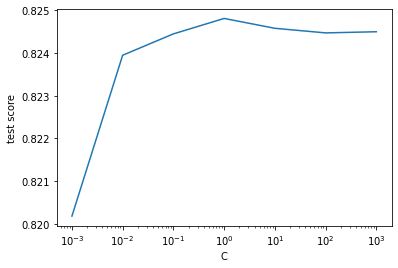

In [107]:
results = pd.DataFrame(grid_logit.cv_results_)
plt.plot(param_grid['C'], results['mean_test_score'])
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('test score')

In [108]:
logit = LogisticRegression(**grid_logit.best_params_)
logit.fit(X_train_pca, y_train)
pred_y = logit.predict(X_test_pca)
roc_auc_score(y_test, pred_y)

0.6437497640351871

### Linear SVC with PCA

In [109]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100], 'dual': [False]}
grid_LinSVC = GridSearchCV(LinearSVC(),param_grid, scoring='roc_auc', cv = 5, n_jobs = -1)
grid_LinSVC.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'dual': [False]},
             scoring='roc_auc')

In [110]:
print(grid_LinSVC.best_params_)
print(grid_LinSVC.best_score_)

{'C': 0.001, 'dual': False}
0.8231064109777145


Text(0, 0.5, 'test score')

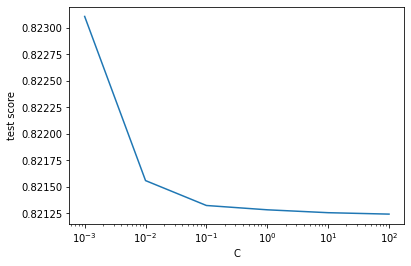

In [111]:
results = pd.DataFrame(grid_LinSVC.cv_results_)
plt.plot(param_grid['C'], results['mean_test_score'])
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('test score')

In [112]:
LinSVC = LinearSVC(**grid_LinSVC.best_params_)
LinSVC.fit(X_train_pca, y_train)
pred_y = LinSVC.predict(X_test_pca)
roc_auc_score(y_test, pred_y)

0.6198701249669649

### SVC with linear kernel with PCA

In [113]:
param_grid = {'kernel':['linear'], 'C':[0.001,0.01,0.1,1,10,100]}
grid_SVClin = GridSearchCV(SVC(),param_grid, scoring='roc_auc', cv = 5, n_jobs = -1)
grid_SVClin.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear']},
             scoring='roc_auc')

In [114]:
print(grid_SVClin.best_params_)
print(grid_SVClin.best_score_)

{'C': 0.1, 'kernel': 'linear'}
0.8177525182691727


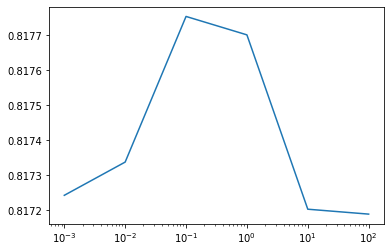

In [115]:
results = pd.DataFrame(grid_SVClin.cv_results_)
plt.plot(param_grid['C'], results['mean_test_score'])
plt.xscale('log')

In [116]:
SVC_lin = SVC(**grid_SVClin.best_params_)
SVC_lin.fit(X_train_pca, y_train)
pred_y = SVC_lin.predict(X_test_pca)
roc_auc_score(y_test, pred_y)

0.6391626080718844

### SVC with poly kernel - PCA transformed

In [117]:
param_grid = {'kernel':['poly'], 'degree':[1,2,3,4,5],'C':[.001,.01,.1,1,10,100],'coef0':[0,.001,.01,.1,1]}
grid_poly = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_poly.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'coef0': [0, 0.001, 0.01, 0.1, 1],
                         'degree': [1, 2, 3, 4, 5], 'kernel': ['poly']},
             scoring='roc_auc')

In [118]:
print(grid_poly.best_params_)
print(grid_poly.best_score_)

{'C': 10, 'coef0': 0, 'degree': 1, 'kernel': 'poly'}
0.8177942854599956


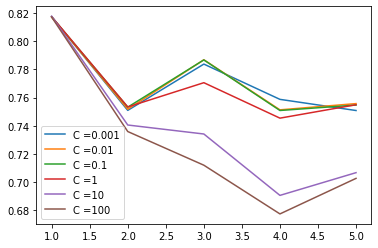

In [119]:
results = pd.DataFrame(grid_poly.cv_results_)
for c in param_grid['C']:
    plt.plot(param_grid['degree'],results['mean_test_score'][(results['param_C'] == c) &
                                                               (results['param_coef0'] == 0)],
            label = 'C ={}'.format(c))
plt.legend()

In [120]:
grid_poly = SVC(**grid_poly.best_params_)
grid_poly.fit(X_train_pca, y_train)
pred_y = grid_poly.predict(X_test_pca)
roc_auc_score(y_test, pred_y)

0.642164080492317

### SVC with RBF kernel - PCA transformed

In [121]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'kernel':['rbf']}
grid_RBF = GridSearchCV(SVC(), param_grid, scoring = 'roc_auc', cv=5, n_jobs = -1)
grid_RBF.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             scoring='roc_auc')

In [122]:
print(grid_RBF.best_params_)
print(grid_RBF.best_score_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.8173769949873014


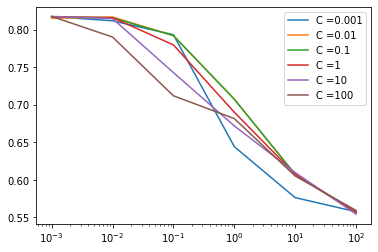

In [123]:
results = pd.DataFrame(grid_RBF.cv_results_)
for c in param_grid['C']:
    plt.plot(param_grid['gamma'],results['mean_test_score'][(results['param_C'] == c)],
            label = 'C ={}'.format(c))
plt.legend()
plt.xscale('log')

In [124]:
grid_RBF = SVC(**grid_RBF.best_params_)
grid_RBF.fit(X_train_pca, y_train)
pred_y = grid_RBF.predict(X_test_pca)
roc_auc_score(y_test, pred_y)

0.6416921508664628

### Decision tree with PCA

In [125]:
param_grid = {'max_depth': np.arange(1,10)}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', cv=5, n_jobs = -1)
grid_tree.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc')

In [126]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)

{'max_depth': 2}
0.7417121369607853


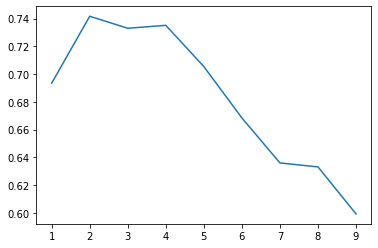

In [127]:
results = pd.DataFrame(grid_tree.cv_results_)
plt.plot(param_grid['max_depth'], results['mean_test_score'])

In [128]:
grid_tree = DecisionTreeClassifier(**grid_tree.best_params_)
grid_tree.fit(X_train_pca, y_train)
pred_y = grid_tree.predict(X_test_pca)
roc_auc_score(y_test, pred_y)

0.6040510439083324

### PCA Results
This is a table comparing the untransformed data to PCA validation scores. All scores are roc auc scores

| Model | Untransformed Validation | PCA Validation|
|---|---|---|
| KNN | 0.7724 | 0.7679 |
| Logistic Regression | 0.8261 | 0.8248|
| Linear SVC | 0.8270 | 0.8178 |
| SVC with Linear Kernel | 0.8231 | 0.8178 |
| SVC with Poly Kernel | 0.8189 | 0.8178 |
| SVC with RBF Kernel | 0.8224 | 0.8174 |
| Decision Tree | 0.7866 | 0.7417 |

<br>
<br>
This is a table comparing untransformed test scores to PCA test scores (roc auc scoring)

| Model | Untransformed Test | PCA Test |
|---|---|---|
| KNN | 0.6659 | 0.6368 |
| Logistic Regression | 0.6366 | 0.6437 |
| Linear SVC | 0.6336 | 0.6199 |
| SVC with Linear Kernel | 0.6458 | 0.6392 |
| SVC with Poly Kernel | 0.6458 | 0.6422 |
| SVC with RBF Kernel | 0.6458 | 0.6417 |
| Decision Tree | 0.6914 | 0.6041 |

<br>
<br>
This is a table comparing untransformed best parameters to PCA transformed best parameters

| Model | Untransformed | PCA |
|---|---|---|
| KNN | n_neighbors = 9 | n_neighbors = 9 |
| Logistic Regression | C = 0.1 | C = 1 |
| Linear SVC | C = 0.01 | C = 0.001 |
| SVC with Linear Kernel | C = 0.1 | C = 0.1 |
| SVC with Poly Kernel | C = 1, coef0 = 0, degree = 1 | C = 10, coef0 = 0, degree = 1 |
| SVC with RBF Kernel | C = 100, Gamma = 0.001 | C = 100, Gamma = 0.001 |
| Decision Tree | max_depth = 3 | max_depth = 2 |

<br>
<br>
In general, both validation scores and test scores dropped as a result of PCA. 

## Deep Learning

In [129]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.metrics import AUC

np.random.seed(0)
tensorflow.random.set_seed(0)

In [130]:
X_train.shape

(1406, 40)

Grid search doesn't work on the sequential adding method we learned in class, so I used the method below. I also included the method of building the model in class, but without a grid search

In [131]:
def create_model():
    model = Sequential()
    model.add(Dense(35, input_dim = 40, activation='relu', name = 'input_layer')) 
    model.add(Dense(25, activation = 'relu', name = 'hidden_layer'))
    model.add(Dense(1, activation = 'sigmoid', name = 'output_layer'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
    return model

In [132]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [133]:
%%time

param_grid = {'batch_size':[10,25,50,75,100], 'epochs':np.arange(15,30,2)}
grid = GridSearchCV(model, param_grid, cv= 5, n_jobs = -1, scoring = 'roc_auc')
grid.fit(X_train, y_train)

Wall time: 1min 55s


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002030C4A1940>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 25, 50, 75, 100],
                         'epochs': array([15, 17, 19, 21, 23, 25, 27, 29])},
             scoring='roc_auc')

In [134]:
print(grid.best_params_)
print(grid.best_score_)

{'batch_size': 50, 'epochs': 21}
0.8287826657680165


In [135]:
tensorflow.keras.backend.clear_session()
model = Sequential()

model.add(Dense(35, input_dim = 40, activation='relu', name = 'input_layer')) 
model.add(Dense(25, activation = 'relu', name = 'hidden_layer'))
model.add(Dense(1, activation = 'sigmoid', name = 'output_layer')) 

In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 35)                1435      
_________________________________________________________________
hidden_layer (Dense)         (None, 25)                900       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 26        
Total params: 2,361
Trainable params: 2,361
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
model.fit(X_train, y_train, **grid.best_params_)

Epoch 1/21
29/29 [==============================] - 1s 2ms/step - loss: 0.6297 - auc: 0.5284
Epoch 2/21
29/29 [==============================] - 0s 2ms/step - loss: 0.5097 - auc: 0.7375
Epoch 3/21
29/29 [==============================] - 0s 2ms/step - loss: 0.4592 - auc: 0.8060
Epoch 4/21
29/29 [==============================] - 0s 2ms/step - loss: 0.4359 - auc: 0.8205
Epoch 5/21
29/29 [==============================] - 0s 2ms/step - loss: 0.4261 - auc: 0.8289
Epoch 6/21
29/29 [==============================] - 0s 2ms/step - loss: 0.4192 - auc: 0.8348
Epoch 7/21
29/29 [==============================] - 0s 2ms/step - loss: 0.4126 - auc: 0.8409
Epoch 8/21
29/29 [==============================] - 0s 2ms/step - loss: 0.4132 - auc: 0.8404
Epoch 9/21
29/29 [==============================] - 0s 2ms/step - loss: 0.4059 - auc: 0.8472
Epoch 10/21
29/29 [==============================] - 0s 2ms/step - loss: 0.4039 - auc: 0.8487
Epoch 11/21
29/29 [==============================] - 0s 2ms/step - lo

In [138]:
train_loss_and_metrics = model.evaluate(X_train, y_train)
test_loss_and_metrics = model.evaluate(X_test, y_test)
test_loss_and_metrics

11/11 [==============================] - 0s 2ms/step - loss: 0.5124 - auc: 0.7898


[0.5123568177223206, 0.7898025512695312]

In [139]:
test_pred = pd.DataFrame(model.predict(X_test) > 0.5)
roc_auc_score(y_test, test_pred)

0.644863517952203

The roc auc score for the deep learning model is about 0.65 and the accuracy score for the test set is around 0.79, although it depends on the seed.